# 1.PREDICTION USING SUPERVISED ML

# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. We are using Python3 and Jupyter IDE for this task.

In [1]:
#Importing all the warnings 
import warnings
warnings.filterwarnings("ignore")

In [20]:
#Importing the useful libraries required for this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

In [5]:
# Reading data 
s_data = pd.read_csv("score.csv")

print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
s_data.shape

(25, 2)

In [13]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [14]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
s_data.size

50

In [18]:
s_data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


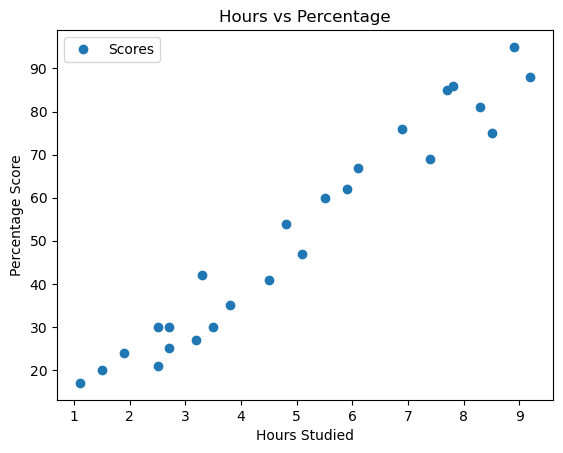

In [11]:
#Plotting the data to find the relationship between no. of hours studied and scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## We can see that there is linear relationship between them . 

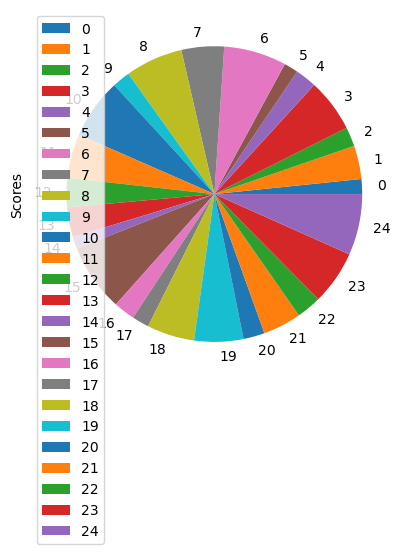

In [22]:
s_data.plot.pie(x="Hours",y="Scores")
plt.show()

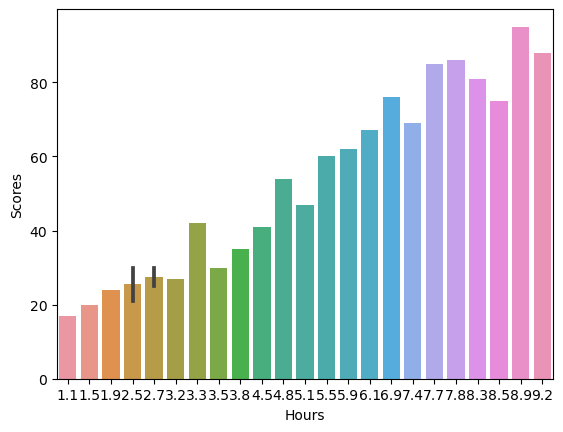

In [24]:
sns.barplot(data=s_data,x="Hours" ,y="Scores")
plt.show()

## Linear Regression Model 

In [25]:
# Next step is to split the data into attributes and labels
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  
# Next step is to split the data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 


## Training Algorithm 

In [26]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


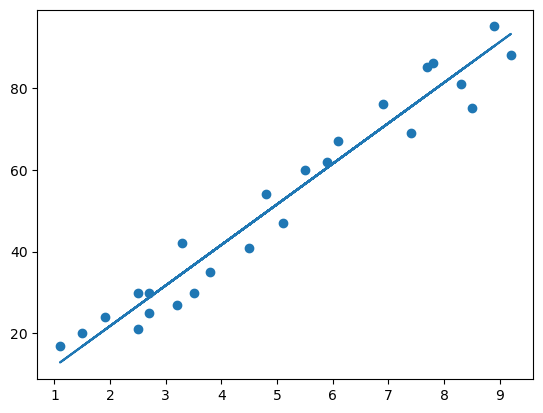

In [27]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Prediction of Model

In [28]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [43]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  


In [34]:
hours = 9.25
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours in one day', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours in one day [93.69173249]


## Model Evaluation

In [36]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_pred[:5])
mean_abs_error = mean_absolute_error(y_test, y_pred[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 21.598769307217456
Mean absolute Error: 4.183859899002982


### Hence, we can conclude that with increase in number of study hours , the scores are better.